Example notebook showing how to use the nested sampler

In [1]:
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
from scipy.stats import multivariate_normal

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [3]:
from nnest import NestedSampler

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Himmelblau
#dims = 2
#def loglike(z):
#    z1 = z[:, 0]
#    z2 = z[:, 1]
#    return - (z1**2 + z2 - 11.)**2 - (z1 + z2**2 - 7.)**2
#def transform(x):
#    return 5. * x

In [6]:
# Rosenbrock
#dims = 2
#def loglike(z):
#    return np.array([-sum(100.0 * (x[1:] - x[:-1] ** 2.0) ** 2.0 + (1 - x[:-1]) ** 2.0) for x in z])
#def transform(x):
#    return 5. * x

In [7]:
# Gauss
#dims = 2
#corr = 0.99
#def loglike(x):
#    return multivariate_normal.logpdf(x, mean=np.zeros(dims), cov=np.eye(dims) + corr * (1 - np.eye(dims)))
#def transform(x):
#    return 3. * x

In [8]:
# Eggbox
dims = 2
def loglike(x):
    chi = (np.cos(x[:,0] / 2.))*(np.cos(x[:,1] / 2.))
    return (2. + chi)**5
def transform(x):
    return x * 5 * np.pi

In [9]:
sampler = NestedSampler(dims, loglike, transform=transform, num_live_points=1000, flow='spline')

Creating directory for new run logs/test/run47
[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=23, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_fe

In [10]:
sampler.run()

[nnest.sampler] [INFO] MCMC steps [10]
[nnest.sampler] [INFO] Initial scale [1.4142]
[nnest.sampler] [INFO] Volume switch [-1.0000]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0032]
[nnest.trainer] [INFO] Epoch [1] train loss [0.0179] validation loss [0.0192]
[nnest.trainer] [INFO] Epoch [50] train loss [0.0154] validation loss [0.0168]
[nnest.trainer] [INFO] Epoch [100] train loss [0.0149] validation loss [0.0164]
[nnest.trainer] [INFO] Epoch [150] train loss [0.0147] validation loss [0.0160]
[nnest.trainer] [INFO] Epoch [200] train loss [0.0145] validation loss [0.0159]
[nnest.trainer] [INFO] Epoch [250] train loss [0.0144] validation loss [0.0158]
[nnest.trainer] [INFO] Epoch [300] train loss [0.0143] validation loss [0.0157]
[nnest.trainer] [INFO] Epoch [350] train loss [0.0142] validation loss [0.0156]
[nnest.trainer] [INFO] Epoch [400] train loss [0.0141] validation loss [0.0156]
[nnest.trainer] [INFO] Epoch [450] train loss 

[nnest.trainer] [INFO] Epoch [200] train loss [-0.0208] validation loss [-0.0213]
[nnest.trainer] [INFO] Epoch [250] train loss [-0.0209] validation loss [-0.0214]
[nnest.trainer] [INFO] Epoch [300] train loss [-0.0210] validation loss [-0.0214]
[nnest.trainer] [INFO] Epoch [321] ran out of patience
[nnest.trainer] [INFO] Best epoch [271] validation loss [-0.0216]
[nnest.sampler] [INFO] Acceptance [0.3900] min ESS [1.1822] max ESS [1.3465] average jump distance [0.0210]
[nnest.sampler] [INFO] Step [4000] loglstar [2.2240e+02] maxlogl [2.4300e+02] logz [2.1556e+02] vol [1.83156e-02] ncalls [24265] scale [0.0689]
[nnest.sampler] [INFO] Acceptance [0.3600] min ESS [1.7168] max ESS [2.3737] average jump distance [0.0524]
[nnest.sampler] [INFO] Step [4200] loglstar [2.2598e+02] maxlogl [2.4300e+02] logz [2.1895e+02] vol [1.49956e-02] ncalls [25830] scale [0.0756]
[nnest.sampler] [INFO] Acceptance [0.4700] min ESS [1.3031] max ESS [1.3743] average jump distance [0.0705]
[nnest.sampler] [INFO

In [11]:
print(sampler.logz)

235.97797465879856


In [12]:
mc = MCSamples(samples=sampler.samples, weights=sampler.weights, loglikes=sampler.loglikes)

Removed no burn in


In [13]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())

3119.12832047762
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1     -8.4683642E-01  9.2731985E+00 -1.3378994E+01  1.0687345E+01  two   -1.6008775E+01  1.5510327E+01  two   -1.8502698E+01  1.8203343E+01  two     p_{1}
param2     -8.9876105E-02  9.2294237E+00 -1.2530051E+01  1.2509796E+01  two   -1.2701662E+01  1.2690010E+01  two   -1.2776591E+01  1.2768250E+01  two     p_{2}



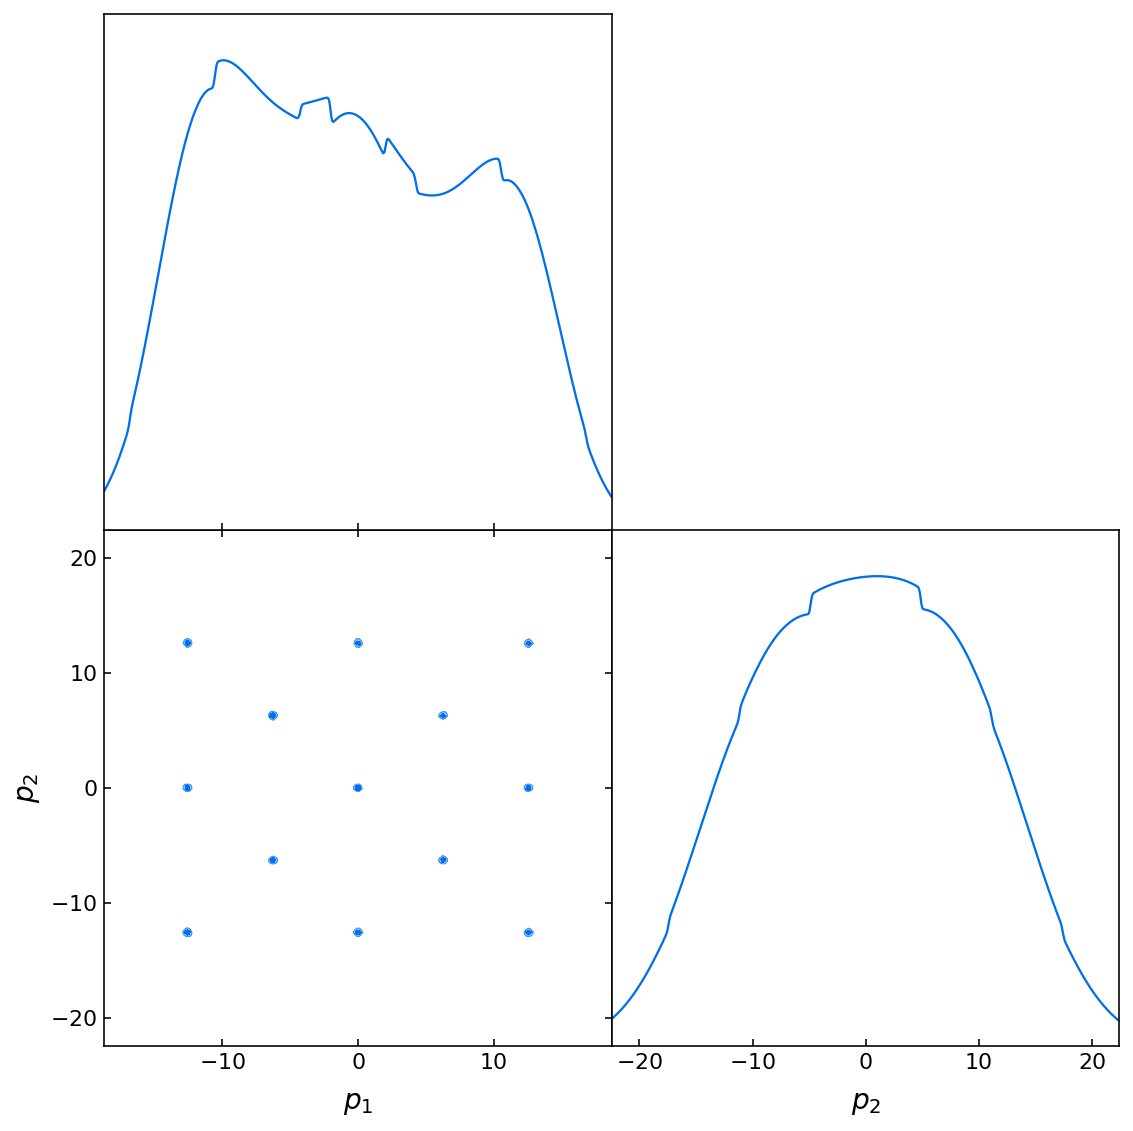

In [24]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)